#### Tem Troll Troll Trolley - Group 42

# DISCLAIMER:
This is not our originally proposed project. We decided to change the topic after submitting the original proposal where we intended to create a predictive model of the impact of the expansion of trolley systems on highway rush hour traffic. We found the data necessary to make a predictive model was both sparse and would require too much time to clean. We, therefore, have changed our topic to one requiring less cleaning for a greater amount of data. Our team name remains as an homage to our dead project.

# Overview
Our project compares the regional crime rates to the perceived scenic value of counties in England and Wales. We found previous literature that linked scenic areas to an increase in resident happiness, happiness to a decrease in crime, and wealth to decrease crime in wealthy countries. Using these relationships, we decided to take a closer look on whether scenery affects crime rates and if so, to what extent. To determine if scenery is actually having an effect, we controlled for the effects of income with multivariate analysis.

# Names & Group Members IDs

- Yunan Zhang： A15704964
- Woonjoon Baek： A15745133
- Mazen Siddiqui： A92033769
- Mische Holland： A13803935
- Erika Joun：  A13673598
- Tiancheng Jiang： A14518985

# Research Question
What effect does scenery have on crime rate in England and Wales?

# Background and Prior Work
A topic that is not often explored is the effect that the aesthetics of our surroundings have on our well-being. The impact might be more than we think, as Cognitive Science shows that our brains are constantly processing visual input in ways we can't detect consciously. In urban cities, beauty is often overlooked as non-essential and is sacrificed for the sake of costs and functionality. On the contrary, studies have shown the many positive effects of having beautiful surroundings, as well as the detriments of bland and unsightly scenery:

 - Reported happiness is greater in more scenic locations:
https://www.nature.com/articles/s41598-019-40854-6

 - Visual art in hospitals makes patients more comfortable and happier:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5328392/

 - Patients in newer wards recovered faster and needed less pain medication:
http://www.wales.nhs.uk/sites3/documents/254/ArchHealthEnv.pdf

We will be expanding on this question to determine if scenery also helps to curb crime. We will be exploring this on a larger scale by comparing the scenery perceptions and crime rates of regional data, specifically counties in England and Wales. We will also be controlling for other factors such as population and income levels that may also have an effect on the crime rate.

The inception of this project began with a recently published article in Nature where researchers quantified both scenery and happiness in regions of the UK and found a positive correlation between the two. (https://www.nature.com/articles/s41598-019-40854-6). To build on that work, we looked into other variables that could be affected by crime. In this social study,  https://journals.sagepub.com/doi/10.1177/1477370814536323, they found that happiness correlates inversely to crime, concluding happier people generally commit less crime. Knowing that scenery correlates to happiness which in turn correlates to crime, we aimed to do a direct comparison between scenery and crime. To add onto our analysis of crime, we wanted to look at possible correlations between wealth and scenery. In this other social study, https://ideas.repec.org/p/hcx/wpaper/0907.html, the researchers found that crime decreases as wealth increases, but only in wealthy countries. Since the UK is a wealthy country in the world and based on the various studies we looked at, we hoped to see some sort of correlation between income and scenery.

While our work will only show correlation and not causation, further study into the cause for correlation could lead to exciting and novel methods of governance. A shown relation between scenery and crime rates could lead to more novel crime prevention methods such as improved scenic urban planning or increased preservation of scenic areas. 




# Hypothesis
We predict that counties in England and Wales with more beautiful scenery will have less crime, because scenic locations with happier people will be less likely to commit crime. As for what types of crime are reduced, we predict that violent crime will be reduced the most 

# Datasets
For this project, we used three sets of data: scenery ratings, regional crime rates, and regional household disposable income.
#### Scenery data: 
https://www.nature.com/articles/s41598-019-40854-6<br/>
The scenery rating data was taken from the recently published paper relating happiness to scenery. The scenery rating data was gathered through an online survey in 2014 where users rated a series of photos for scenic value and is publicly available through the online published article. It only contains ratings for photos that have been rated 3 times or more by different people, to control for the impact of people’s personal tastes. The original data set named votes.tsv. Its shape is 212213 x 7 and contains ID, Lat, Lon, Average, Variance, Votes, and Geograph URI. This data did not have the location in counties so it was processed with the following webscraping code to follow the link and extract information listed on the photo details page. 

These new columns include:
- Place - The name of the scenic site
- Near - Which location the scenic site is near to, as described in the webpage
- County - The county the scenic site is located in
- Category - The category of scenic site (farmland, church, village, etc.)
- Image - The photograph of the scenic site
- Date - The date the photograph was taken

Faithfulness of the data: There are some problems with the reliability of the data as the ratings are only dependant on one photo of an area. Because the rating website is also online, anyone can rate places even if they have never been there before. We can expect the data to be biased based on the quality of the photo representing the place. However, a good thing is that the photos were taken in small intervals of 1km of area, meaning that the photos are more likely to accurately portray the scenery of an area. 

Web scraping code used for obtaining the scenery data is provided below.


#### Crime rate data:
https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/datasets/policeforceareadatatables <br/>
The crime rate data was taken from the UK’s Office of National Statistics and lists the counts of different types of crime in 2018 by police force area in the first tab of data. The other tabs were not considered for this project because they were not raw data values and contained some longitudinal study analysis that was not relevant to the project. We did take the population data per police force from the second tab of data in order to normalize the raw crime counts data in order to properly compared between police force areas. The shape of the data with the combined population data and raw crime counts overall and by type is 43x24.

#### Income data:
https://www.ons.gov.uk/economy/regionalaccounts/grossdisposablehouseholdincome/datasets/regionalgrossdisposablehouseholdincomegdhi <br/>
The income data was taken from the UK’s Office of National Statistics and lists the average disposable household income in 2018 by region. We only took the first tab of data and the shape of that data is 40x2.<br/>

To combine these datasets, we had to convert all regions in the income data and all counties from the scenery data into police force areas in order to compare all three variables since police force area was the most broad regional category.




#### Webscraping Code:
```
import requests
import bs4
from bs4 import BeautifulSoup
import csv
import pandas as pd

def storeData(url, rating, variance, id_num):
	page = requests.get(url)
	soup = BeautifulSoup(page.text, features="html.parser")

	# Skip if page is not found
	header = soup(id="maincontent")[0].find('h2').getText()
	if header == "Sorry, page not found":
		print("Skipping id=" + id_num)
		return

	# Include ID
	print('ID: ' + str(id_num))

	# Retrieve place name
	place = soup(itemtype="schema.org/Photograph")[0].find('h2').contents[1]
	place = place[3:]
	print('Place: ' + place)

	# Include Rating
	print('Rating: ' + rating)

	# Include Variance
	print('Variance: ' + variance)

	# Retrieve near area (village, city, etc.)
	near = soup(itemprop="contentLocation")[0].findAll('b', text=True)[-1].getText()
	print('Near: ' + near)

	# Retrieve county
	county = soup(itemprop="contentLocation")[0].find('i', text=True).getText()
	county = county.split(',')[1]
	county = county[1:]
	print('County: ' + county)

	# Retrieve category
	category = soup(itemprop="keywords") or ''
	if category != '':
		category = category[0].getText()
	print("Category: " + category)

	# Retrieve image
	image = soup(itemprop="contentURL")[0]['src']
	print("Image: " + image)

	# Retrieve date taken
	dateData = soup(itemprop="exifData") or soup(itemprop="uploadDate")
	date = dateData[0].getText()
	print("Date: " + date)

	# Include URL
	print("URL: " + url)

	filewriter.writerow([id_num, place, rating, variance, near, county, category, image, date, url])


# Open csv
csvfile = open('scenery.csv', 'a', encoding='utf-8')
filewriter = csv.writer(csvfile, lineterminator = '\n')

# Checkpoint starts the program loop starting with that id number
df = pd.read_csv('scenery.csv', encoding='ISO-8859-1')
if len(df) == 0:
	checkpoint_id = -1
else:
	#checkpoint_id = df['ID'][len(df['ID']) - 1] + 1
        checkpoint_id = 217675

# Store all urls and ratings
if checkpoint_id == -1:
	filewriter.writerow(['ID', 'Place', 'Rating', 'Variance', 'Near', 'County', 'Category', 'Image', 'Date', 'URL'])
with open('./votes.tsv', 'r') as fp:
	for count, line in enumerate(fp):
		if count != 0:
			data = line.split('\t')
			id_num = data[0]

			if int(id_num) >= checkpoint_id:
				rating = data[4]
				variance = data[3]
				url = data[6]
				storeData(url, rating, variance, id_num)
				print()

fp.close()
```

# Setup

Libraries used:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statistics
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data Cleaning
### Cleaning methods

#### Scenery data 
- Since this data was created using our own webscraping code, we were able to ensure we got exactly what we needed. The only cleaning that was needed was generalizing the locations into their respective Police Force Areas (PFA) in order to be able to relate it to the crime data.
- This was done by loading the csv into a dataframe and transforming the counties into PFA using our ```matchCounty``` function. 

#### Crime data 
- This dataset was very organized but was split into multiple different sheets in excel. We had to remove some rows from excel because they included general information of the dataset and would make it difficult to extract the data into a dataframe. The first tab (“numbers_crime”) was of most interest to us, since it showed the number of each offence in each Police Force Area. The other sheet of interest was the “rate1000_crime” because it included the population in each police force area and we could use this to normalize the data. We took the population data from the rate1000_crime and integrated it into our “numbers_crime” dataframe, as described by the code below.
- We normalized the data by dividing by the population count.
- Shortened the following column names:
    - “Total recorded crime (excluding fraud)” -> “Total recorded crime”<br/>
    - “Death or serious injury - unlawful driving” -> “Unlawful driving”<br/>

Code for taking the population from one sheet and putting it into the dataframe for the crime dataframe:
```
crime_df = number_crime

# Add population figures column from rate1000_crime to number_crime
crime_df.insert(1, column='Population figures', value=rate1000_crime[rate1000_crime.columns[1]])

# Clean column labels
datafields = ['Area Name', 'Population figures',
'Total recorded crime', 'Violence against the person', 'Homicide',
'Violence with injury', 'Violence without injury', 'Stalking and harassment',
'Unlawful driving', 'Sexual offences', 'Robbery',
'Theft offences', 'Burglary', 'Residential burglary',
'Non-residential burglary', 'Vehicle offences', 'Theft from the person',
'Bicycle theft', 'Shoplifting', 'Other theft offences',
'Criminal damage and arson', 'Drug offences', 'Possession of weapons offences',
'Public order offences', 'Miscellaneous crimes']

number_crime.columns = datafields
```

#### Income data 
- This dataset included the average houselhold income per county in million GBP. Similar to the scenery dataset, we had to convert it into the Police Force Area. We did this once again by using our ```matchCounty``` function. 
- Dropped data for 2016, only keeping the data for 2017 so that it matches with all our other datasets.



The code below sets up our Police Force Area dataframe, which categorizes subcounties into their respective Police Force Areas. We check how many unique counties are before and after running our ```matchCounty``` function.

In [2]:
#read the pfac data, which shows the actuall police control area of the county
pfac = pd.read_csv('../data/PFAC.csv')

#read the scenery data 
df = pd.read_csv('scenery.csv', encoding = "utf-8-sig")
print('Size of the dataset: ' + str(df.shape[0]))
# Rating and Variance are mislabeled, switch them around
df.rename(columns={'Variance': 'Rating', 'Rating': 'Variance'}, inplace=True)

#switch the colomns and rows for pfac data
pfac = pfac.transpose()
pfac.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac.iloc[0]
pfac = pfac[1:]
pfac.columns = new_header
crime_df = pd.read_csv('../data/number_crime.csv')

#make list of crime data's column names
cols = list(crime_df)

#remove all commas from the numbers
crime_df[cols] = crime_df[cols].replace(',', '', regex = True)

Size of the dataset: 212155


In [3]:
#find the county
def matchCounty(area):
    for i in pfac.columns:
        if area in list(pfac[i]):
            return i
    return np.nan

In [4]:
#the unique
print('Unique counties before cleaning: ' + str(len(df['County'].unique())))

Unique counties before cleaning: 214


In [5]:
df['County'] = df['County'].apply(matchCounty)
print('Unique counties after cleaning: ' + str(len(df['County'].unique())))

Unique counties after cleaning: 44


# DATA VISUALIZATION:

### Bar plot:
- A bar plot was used to see any outliers in the rating data and see how they relate to another. It showed that the ratings were generally consistent across regions. Our standard deviation was used as the error bars.

In [6]:
df_rate = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'Category', 'Image', 'Date', 'URL'])
df_rate = df_rate.dropna()
df_rate['Avg_Rating'] = df_rate['Rating']
df_rate['Standard_Deviation'] = df_rate['Rating']
df_rate = df_rate.drop(columns=['Rating'])
df_rate['num_pictures'] = 1


aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}
df_rate_mean = df_rate.groupby(df_rate['County']).aggregate(aggregation_functions)
df_rate_mean.head()

,Avg_Rating,Standard_Deviation,num_pictures
County,,,
Avon and Somerset,4.073719,1.358304,4755
Bedfordshire,3.616219,1.220985,1187
Cambridgeshire,3.565243,1.166748,3209
Cheshire,3.803472,1.370173,2296
City of London,3.614950,1.232997,4


AxesSubplot(0.125,0.125;0.775x0.755)


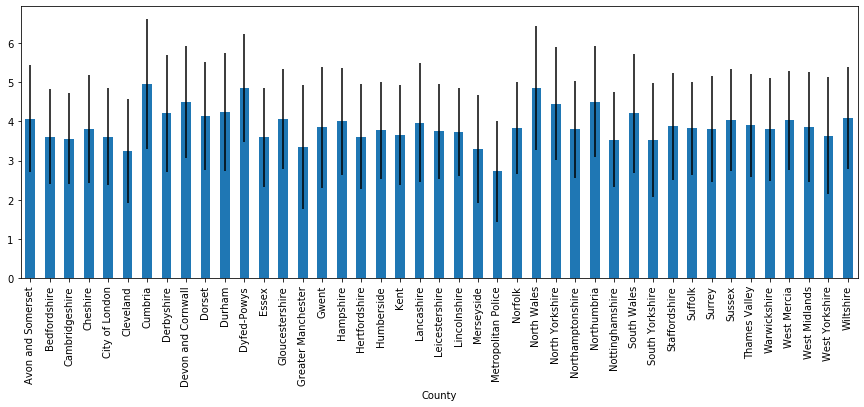

In [7]:
plot1 = df_rate_mean['Avg_Rating'].plot(figsize=(15, 5),kind='bar',yerr=df_rate_mean['Standard_Deviation'])
print(plot1)

# Part 1 - Does aesthetic scenery appear to reduce crime?

In order to answer this question we need to see how crime and scenery relate. This is accomplished using a correlation and a scatter matrix.

### Correlation matrix

- A correlation matrix allowed us to see the correlation between the various different types of crime. This helped us decide which types of crime to look at in more depth in our linear and multivariable models. Theft from the person correlated very highly with scenery and robbery correlated very highly with income.

### Scatter Matrices:

- A scatter matrix was done to see relations among the various different types of crime related to each other. By looking at the scatter matrix, theft from the person had the highest correlation with scenery, showing that as scenery rating goes up, theft offences decrease. 



In [8]:
df_crime = pd.read_csv('../data/crime_final.csv')
df_crime.drop(df_crime.columns[0],axis=1,inplace = True)

#add the average scenery rating to the crime dataframe as a column
t = df_rate_mean['Avg_Rating']
df_crime['avg_scenery'] = t

l = df_rate_mean.index.tolist()
for i in range(0,41):
    
    #match the police force area name in scenery dataframe to the PFA name in crime dataframe
    if df_crime.loc[i]['AreaName'] in l:     
        df_crime.set_value(i,'avg_scenery', df_rate_mean.loc[df_crime.loc[i]['AreaName']]['Avg_Rating'])
        
        

df_crime = df_crime.dropna()

#remove the commas in the dataset for convertion to int values
for i in range(0,41):
     for j in df_crime.columns:
        if ',' in str(df_crime.loc[i][j]):
             df_crime.set_value(i, j, df_crime.loc[i][j].replace(',' , ''))

#set values as type float
for i in df_crime.columns:
     if i != 'AreaName':
        df_crime[i] = df_crime[i].astype(float)

#normalize the crime counts by population in the region
df_crime_norm = pd.DataFrame()
df_crime_norm['AreaName'] = df_crime['AreaName']
for i in df_crime.columns:
    #normalize all columns except 'PopulationFigures', 'avg_scenery', 'HouseHoldfigures'
    if (i != 'AreaName') & (i != 'PopulationFigures') & (i != 'avg_scenery') & (i != 'HouseHoldfigures'):
        df_crime_norm[i] = df_crime[i] / df_crime['PopulationFigures']
        
df_crime_norm['avg_scenery'] = df_crime['avg_scenery']
df_crime_norm.head()

#drop outlier(London metropolitan area)
df_crime_norm.drop(index=27,inplace = True)
df_crime_norm.reset_index(drop=True).head()

#find correlation between columns
df_crime_norm.corr()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,TheftFromThePerson,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery
TotalRecordedCrime,1.000000,0.903419,0.596562,0.723220,0.814026,0.818413,0.147078,0.736742,0.495111,0.790764,...,0.441415,0.051769,0.619430,0.833660,0.825883,0.081959,0.506696,0.756837,0.870745,-0.481173
ViolenceAgainstThePerson,0.903419,1.000000,0.434092,0.779224,0.900779,0.918736,0.177256,0.839539,0.220310,0.501103,...,0.171175,-0.161332,0.511596,0.619899,0.836280,0.021416,0.342632,0.732675,0.872585,-0.238731
Homicide,0.596562,0.434092,1.000000,0.461580,0.391666,0.326473,-0.041253,0.384165,0.558904,0.636160,...,0.457671,0.155425,0.459402,0.524628,0.363961,0.080297,0.450833,0.362809,0.418590,-0.468757
ViolenceWithInjury,0.723220,0.779224,0.461580,1.000000,0.564337,0.626285,-0.050517,0.732123,0.301651,0.473311,...,0.185660,-0.219353,0.484415,0.491666,0.624100,0.022490,0.301361,0.490060,0.617124,-0.198924
ViolenceWithoutInjury,0.814026,0.900779,0.391666,0.564337,1.000000,0.721041,0.239791,0.819622,0.221935,0.433981,...,0.188485,0.006200,0.357910,0.558253,0.683246,0.002554,0.378601,0.730255,0.797445,-0.253274
StalkingAndHarassment,0.818413,0.918736,0.326473,0.626285,0.721041,1.000000,0.189545,0.664243,0.104415,0.429286,...,0.093283,-0.244217,0.521257,0.564453,0.852833,0.033025,0.225688,0.650564,0.825911,-0.173892
UnlawfulDriving,0.147078,0.177256,-0.041253,-0.050517,0.239791,0.189545,1.000000,0.214461,-0.065522,0.085118,...,-0.065930,0.145760,0.167137,0.048864,0.153706,-0.119686,0.132829,0.075099,0.301767,-0.005642
SexualOffences,0.736742,0.839539,0.384165,0.732123,0.819622,0.664243,0.214461,1.000000,0.156163,0.369867,...,0.079133,-0.086455,0.487462,0.512213,0.675734,-0.195834,0.344331,0.631081,0.748041,-0.080493
Robbery,0.495111,0.220310,0.558904,0.301651,0.221935,0.104415,-0.065522,0.156163,1.000000,0.761527,...,0.857456,0.201862,0.095641,0.659862,0.039844,0.183771,0.563010,0.180163,0.212535,-0.663008
TheftOffences,0.790764,0.501103,0.636160,0.473311,0.433981,0.429286,0.085118,0.369867,0.761527,1.000000,...,0.682194,0.346012,0.586433,0.868180,0.469959,0.053711,0.564830,0.339226,0.538221,-0.717214


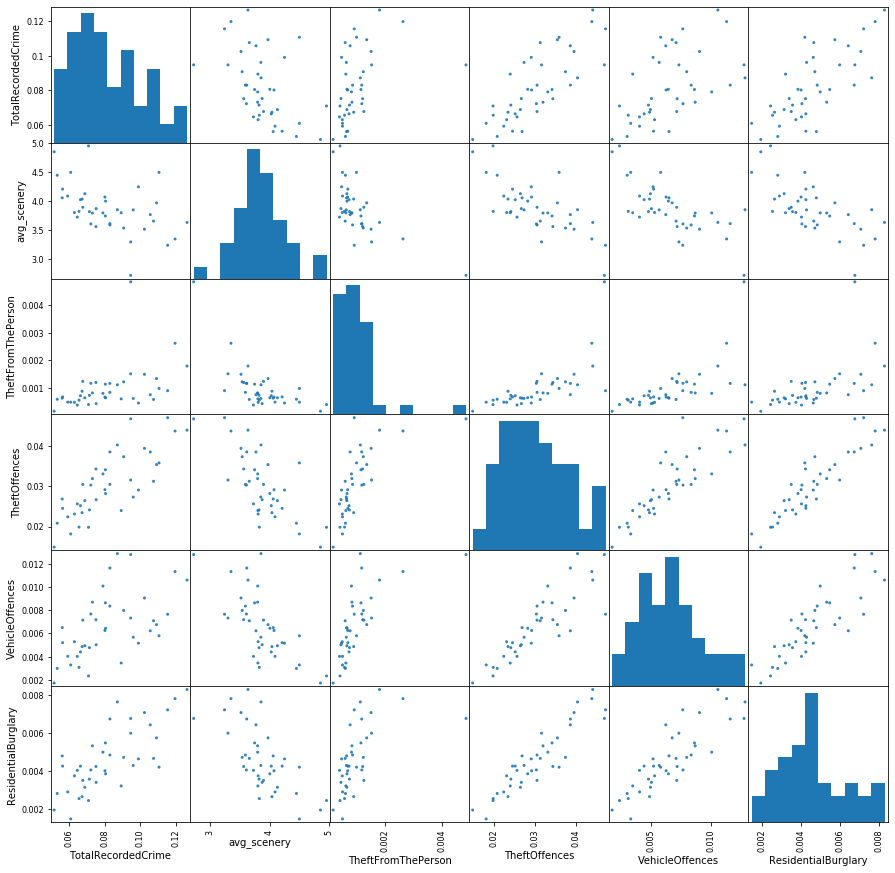

In [9]:
#plot scatter matrix of selected columns with high correlation
pd.plotting.scatter_matrix(df_crime_norm.loc[:,['TotalRecordedCrime','avg_scenery','TheftFromThePerson','TheftOffences','VehicleOffences','ResidentialBurglary']],alpha = 0.9, figsize=(15,15))
plt.show()

From the scatter matrix above, we can see a rough estimate that all the types of crime plotted above show a negative correlation with average scenery; as scenery rating increases, the rate of that specific crime category decreases.

### Geospatial:

- Geospatial analyses were done to help visualize how our various variables relate along Police Force Areas. We looked at the scenery, crime, and income for each Police Force Area.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap



In [11]:
map_df = gpd.read_file('../data/PFA Geospatial Analysis Stuff/Police_Force_Areas_December_2016_Full_Extent_Boundaries_in_England_and_Wales.shp')

We drop the 27th index in our crime data because it represents the City of London Police Force Area. The problem with this point is that it has a very small population compared to the rest, so this greatly skews the value when we normalize it by population.

In [12]:
df_crime['TotalCrimeNorm'] = df_crime['TotalRecordedCrime']/df_crime['PopulationFigures']
df_crime.drop(index=27,inplace = True)
merged = map_df.set_index("pfa16nm").join(df_crime.set_index("AreaName"))
merged = merged.join(df_rate_mean)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


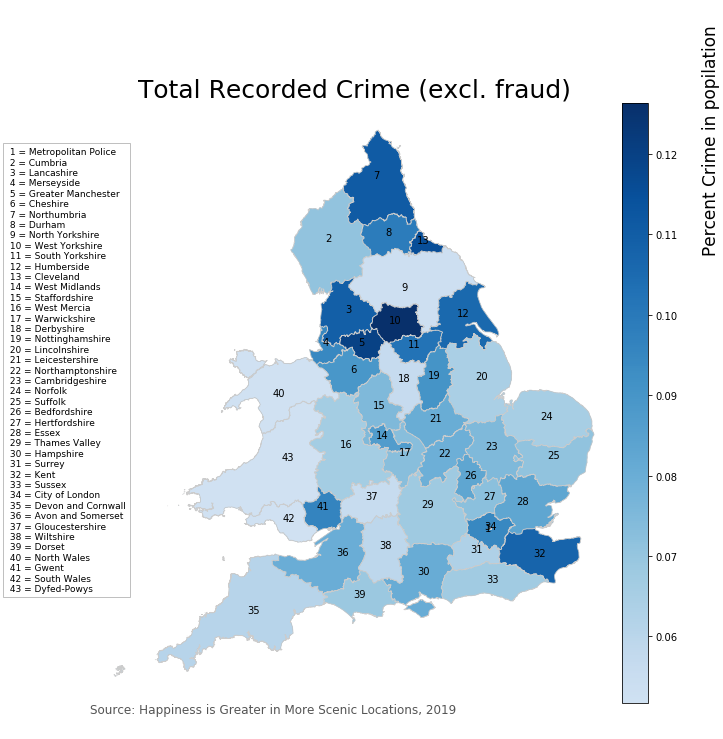

In [13]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'TotalCrimeNorm'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

#labeling
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
base = map_df.plot(ax = ax)
for idx, row in map_df.iterrows():
    plt.annotate(s=row['objectid'], xy=row['coords'], horizontalalignment='center', color = 'black')

# create map
cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.2, 1)
merged.plot(column = variable, cmap = new_cmap, linewidth = 0.8, ax = base, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title and y label
title = ax.set_title("Total Recorded Crime (excl. fraud)", fontdict = {'fontsize': '25', 'fontweight' : '3'})
y_axis = ax.annotate("Percent Crime in popilation", xy = (0.97, 0.66), xycoords = 'figure fraction', rotation = 'vertical',
                    fontsize = 17)

# create an annotation for the data source
ax.annotate('Source: Happiness is Greater in More Scenic Locations, 2019', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# legend box for county labels
leg = pd.DataFrame()
leg['Police Force Area'] = map_df['objectid'].map(str) + ' = ' + map_df['pfa16nm']
ax.annotate(leg.to_string(formatters={'Police Force Area':'{{:<{}s}}'.format(leg['Police Force Area'].str.len().max()).format},
                          index=False, header = None), 
            xy = (0.01,0.2), xycoords = 'figure fraction', fontsize = 9, color = 'black', horizontalalignment = 'left',
            bbox=dict(facecolor='none', edgecolor='silver'))

plt.show()

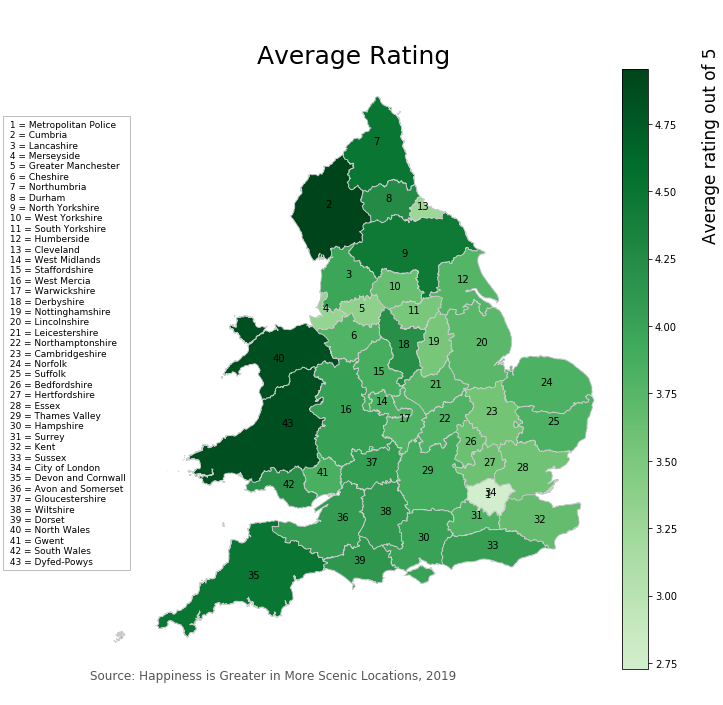

In [14]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Avg_Rating'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

#labeling
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
base = map_df.plot(ax = ax)
for idx, row in map_df.iterrows():
    plt.annotate(s=row['objectid'], xy=row['coords'], horizontalalignment='center', color = 'black')

cmap_2 = plt.get_cmap('Greens')
new_cmap_2 = truncate_colormap(cmap_2, 0.2, 1)
merged.plot(column = variable, cmap = new_cmap_2, linewidth = 0.8, ax = base, edgecolor = '0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap = new_cmap_2, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title and y label
title = ax.set_title("Average Rating", fontdict = {'fontsize': '25', 'fontweight' : '3'})
y_axis = ax.annotate("Average rating out of 5", xy = (0.97, 0.66), xycoords = 'figure fraction', rotation = 'vertical',
                    fontsize = 17)

# create an annotation for the data source
ax.annotate('Source: Happiness is Greater in More Scenic Locations, 2019', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# legend box for county labels
leg = pd.DataFrame()
leg['Police Force Area'] = map_df['objectid'].map(str) + ' = ' + map_df['pfa16nm']
ax.annotate(leg.to_string(formatters={'Police Force Area':'{{:<{}s}}'.format(leg['Police Force Area'].str.len().max()).format},
                          index=False, header = None), 
            xy = (0.01,0.2), xycoords = 'figure fraction', fontsize = 9, color = 'black', horizontalalignment = 'left',
            bbox=dict(facecolor='none', edgecolor='silver'))

plt.show()

# DATA ANALYSIS & RESULTS:
### Linear model and correlation
We chose to stick to linear model analysis because when visualizing the data via scatter matrices, the points were either linearly correlated or random rather than any other type of curve or non-linear correlation. 

In the correlation matrix, the variables with the highest correlation value with average scenery values were "TheftFromThePerson", "TheftOffences", "VehicleOffences", "ResidentialBurglary","SexualOffences". We do a linear regression with patsy on these columns with average scenery along with "TotalRecordedCrime". Results are shown below.


                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     11.45
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00167
Time:                        15:04:55   Log-Likelihood:                 106.32
No. Observations:                  40   AIC:                            -208.6
Df Residuals:                      38   BIC:                            -205.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1695      0.026      6.511      

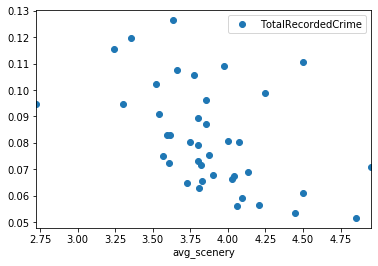

In [15]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statistics

outcome_0, predictors_0 = patsy.dmatrices("TotalRecordedCrime ~ avg_scenery", data = df_crime_norm)
mod_0 = sm.OLS(outcome_0, predictors_0)
res_0 = mod_0.fit()
print(res_0.summary())
df_crime_norm.plot(x='avg_scenery',y='TotalRecordedCrime',style='o')

                            OLS Regression Results                            
Dep. Variable:     TheftFromThePerson   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     31.08
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.18e-06
Time:                        15:04:55   Log-Likelihood:                 241.98
No. Observations:                  40   AIC:                            -480.0
Df Residuals:                      38   BIC:                            -476.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0058      0.001      6.650      

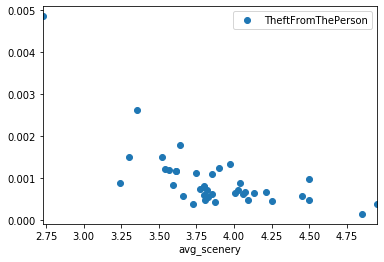

In [16]:
outcome_1, predictors_1 = patsy.dmatrices("TheftFromThePerson ~ avg_scenery", data = df_crime_norm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftFromThePerson',style='o')

                            OLS Regression Results                            
Dep. Variable:          TheftOffences   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     40.25
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.92e-07
Time:                        15:04:56   Log-Likelihood:                 151.49
No. Observations:                  40   AIC:                            -299.0
Df Residuals:                      38   BIC:                            -295.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0835      0.008      9.921      

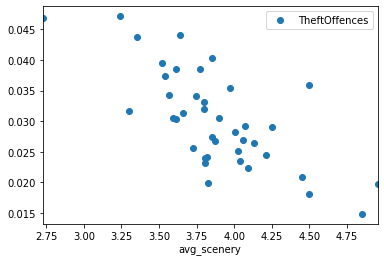

In [17]:
outcome_2, predictors_2 = patsy.dmatrices("TheftOffences ~ avg_scenery", data = df_crime_norm)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftOffences',style='o')

                            OLS Regression Results                            
Dep. Variable:        VehicleOffences   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     36.88
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           4.52e-07
Time:                        15:04:56   Log-Likelihood:                 192.81
No. Observations:                  40   AIC:                            -381.6
Df Residuals:                      38   BIC:                            -378.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0247      0.003      8.247      

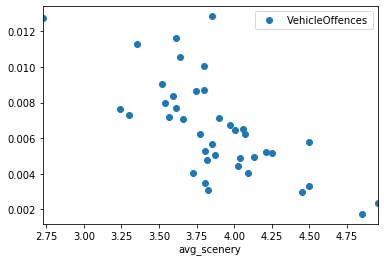

In [18]:
outcome_3, predictors_3 = patsy.dmatrices("VehicleOffences ~ avg_scenery", data = df_crime_norm)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())
df_crime_norm.plot(x='avg_scenery',y='VehicleOffences',style='o')

                             OLS Regression Results                            
Dep. Variable:     ResidentialBurglary   R-squared:                       0.449
Model:                             OLS   Adj. R-squared:                  0.434
Method:                  Least Squares   F-statistic:                     30.92
Date:                 Wed, 12 Jun 2019   Prob (F-statistic):           2.28e-06
Time:                         15:04:56   Log-Likelihood:                 211.16
No. Observations:                   40   AIC:                            -418.3
Df Residuals:                       38   BIC:                            -414.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0151      0.002      7

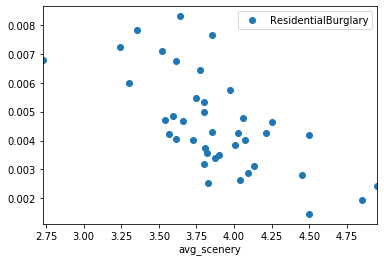

In [19]:
outcome_4, predictors_4 = patsy.dmatrices("ResidentialBurglary ~ avg_scenery ", data = df_crime_norm)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())
df_crime_norm.plot(x='avg_scenery',y='ResidentialBurglary',style='o')

                            OLS Regression Results                            
Dep. Variable:        UnlawfulDriving   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                  0.001210
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.972
Time:                        15:04:56   Log-Likelihood:                 404.95
No. Observations:                  40   AIC:                            -805.9
Df Residuals:                      38   BIC:                            -802.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.439e-05   1.49e-05      0.966      

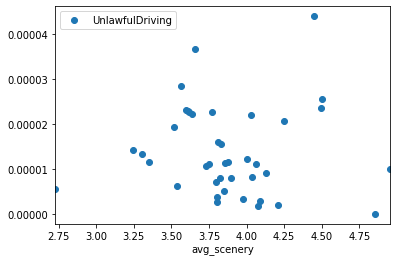

In [20]:
outcome_5, predictors_5 = patsy.dmatrices("UnlawfulDriving ~ avg_scenery", data = df_crime_norm)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())
df_crime_norm.plot(x='avg_scenery',y='UnlawfulDriving',style='o')

                            OLS Regression Results                            
Dep. Variable:         SexualOffences   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2478
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.621
Time:                        15:04:56   Log-Likelihood:                 245.36
No. Observations:                  40   AIC:                            -486.7
Df Residuals:                      38   BIC:                            -483.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0031      0.001      3.792      

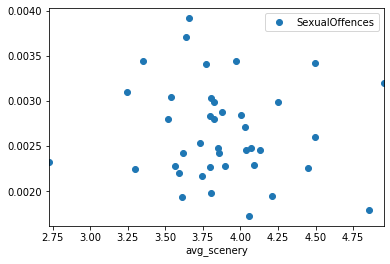

In [21]:
outcome_6, predictors_6 = patsy.dmatrices("SexualOffences ~ avg_scenery", data = df_crime_norm)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())
df_crime_norm.plot(x='avg_scenery',y='SexualOffences',style='o')

# Part 2 - Does scenery have more of an effect on crime than income?

From the linear models above, we can see a pretty consistent negative correlation between the various crime types and the scenery of an area. However, differences in levels of crime can be attributed to other factors besides scenery. A main factor that is known to have a strong correlation with crime is income level of an area. We want to make sure that our results are really from scenery rather than income so we now conduct a multivariable analysis of scenery and income on robbery and theft from person.


Before we get into the analysis, we will first analyze the income data geospatially. Below is code to load and clean the income data using our ```matchCounty``` function.

In [22]:
# df_income_table1: Total GDHI at current basic prices
income_data_file = '../data/income_table1mod.csv'
df_income = pd.read_csv(income_data_file)
df_income = df_income.drop(columns=['2016'])

#read the pfac data, which shows the actuall police control area of the county
pfac2 = pd.read_csv('../data/PFAC 2.csv')

#switch the colomns and rows for pfac data
pfac2 = pfac2.transpose()
pfac2.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac2.iloc[0]
pfac2 = pfac2[1:]
pfac2.columns = new_header

In [23]:
#find the county
def matchCounty(area):
    for i in pfac2.columns:
        if area in list(pfac2[i]):
            return i
    return np.nan

In [24]:
# change 'Region name' to 'Police force area'
df_income['Region name'] = df_income['Region name'].apply(matchCounty)
df_income['Region name'].unique()


# Checking if all the changed counties are Police Force Areas.

array(['Cleveland', 'Durham', 'Northumbria', 'Cumbria',
       'Greater Manchester', 'Lancashire', nan, 'Merseyside',
       'Humberside', 'North Yorkshire', 'South Yorkshire',
       'West Yorkshire', 'Derbyshire', 'Nottinghamshire',
       'Leicestershire', 'Northamptonshire', 'Lincolnshire',
       'West Mercia', 'Warwickshire', 'Staffordshire', 'West Midlands',
       'Cambridgeshire', 'Suffolk', 'Norfolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'City of London', 'Metropolitan Police',
       'Thames Valley', 'Sussex', 'Surrey', 'Hampshire', 'Kent',
       'Avon and Somerset', 'Gloucestershire', 'Wiltshire',
       'Devon and Cornwall', 'North Wales', 'Gwent', 'South Wales',
       'Dyfed-Powys'], dtype=object)

In [25]:
# change 'Region name' column to 'County'
df_income['County'] = df_income['Region name']
df_income = df_income.drop(columns=['Region name'])

# sum all the same County
aggregation_functions = {'2017': 'mean'}
df_income = df_income.groupby(df_income['County']).aggregate(aggregation_functions)


In [26]:
# We get rid of City of London in order for it to mtch our scenery and crime dataframes.

df_income.drop(index='City of London',inplace = True)
df_income.head()

,2017
County,
Avon and Somerset,11045.0
Bedfordshire,4086.0
Cambridgeshire,8399.0
Cleveland,4353.0
Cumbria,9239.0


In [27]:
# Here we add the income data into our crime dataframe so we can run our multivariable analysis

df_crime_norm['avg_income'] = df_income.values
#df_crime['avg_scenery'] = t

l = df_income.index.tolist()
for i in df_crime_norm.index.tolist():
   
    if df_crime_norm.loc[i]['AreaName'] in l:     
        df_crime_norm.set_value(i,'avg_income', df_income.loc[df_crime_norm.loc[i]['AreaName']]['2017'])

        
df_crime_norm.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,AreaName,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
0,Cleveland,0.115502,0.035516,0.000026,0.010346,0.013200,0.011929,0.000014,0.003100,0.001026,...,0.001754,0.015661,0.011213,0.016549,0.002292,0.000666,0.006775,0.002423,3.243521,4353.0
1,Durham,0.099037,0.037949,0.000008,0.009108,0.013230,0.015583,0.000021,0.002992,0.000384,...,0.000752,0.007717,0.008503,0.015214,0.002014,0.000460,0.008160,0.002754,4.249891,4892.5
2,Northumbria,0.110653,0.033069,0.000008,0.009217,0.013794,0.010025,0.000026,0.003418,0.000590,...,0.001399,0.009720,0.011619,0.015699,0.002308,0.000961,0.016154,0.002574,4.499126,23320.0
3,Cheshire,0.089366,0.030927,0.000018,0.010046,0.012230,0.008628,0.000004,0.003031,0.000395,...,0.001496,0.006720,0.007316,0.009640,0.002068,0.000505,0.017053,0.001747,3.803472,4353.0
4,Cumbria,0.070971,0.026573,0.000008,0.009751,0.010979,0.005825,0.000010,0.003196,0.000247,...,0.000594,0.005817,0.006441,0.010951,0.002051,0.000506,0.006188,0.001439,4.954012,9239.0


### Correlation Matrix with Income Data:

In [28]:
#show correlation matrix after adding average income as a column
df_crime_norm.corr()

,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
TotalRecordedCrime,1.000000,0.903419,0.596562,0.723220,0.814026,0.818413,0.147078,0.736742,0.495111,0.790764,...,0.051769,0.619430,0.833660,0.825883,0.081959,0.506696,0.756837,0.870745,-0.481173,0.447633
ViolenceAgainstThePerson,0.903419,1.000000,0.434092,0.779224,0.900779,0.918736,0.177256,0.839539,0.220310,0.501103,...,-0.161332,0.511596,0.619899,0.836280,0.021416,0.342632,0.732675,0.872585,-0.238731,0.364204
Homicide,0.596562,0.434092,1.000000,0.461580,0.391666,0.326473,-0.041253,0.384165,0.558904,0.636160,...,0.155425,0.459402,0.524628,0.363961,0.080297,0.450833,0.362809,0.418590,-0.468757,0.253849
ViolenceWithInjury,0.723220,0.779224,0.461580,1.000000,0.564337,0.626285,-0.050517,0.732123,0.301651,0.473311,...,-0.219353,0.484415,0.491666,0.624100,0.022490,0.301361,0.490060,0.617124,-0.198924,0.371764
ViolenceWithoutInjury,0.814026,0.900779,0.391666,0.564337,1.000000,0.721041,0.239791,0.819622,0.221935,0.433981,...,0.006200,0.357910,0.558253,0.683246,0.002554,0.378601,0.730255,0.797445,-0.253274,0.412687
StalkingAndHarassment,0.818413,0.918736,0.326473,0.626285,0.721041,1.000000,0.189545,0.664243,0.104415,0.429286,...,-0.244217,0.521257,0.564453,0.852833,0.033025,0.225688,0.650564,0.825911,-0.173892,0.200404
UnlawfulDriving,0.147078,0.177256,-0.041253,-0.050517,0.239791,0.189545,1.000000,0.214461,-0.065522,0.085118,...,0.145760,0.167137,0.048864,0.153706,-0.119686,0.132829,0.075099,0.301767,-0.005642,0.265853
SexualOffences,0.736742,0.839539,0.384165,0.732123,0.819622,0.664243,0.214461,1.000000,0.156163,0.369867,...,-0.086455,0.487462,0.512213,0.675734,-0.195834,0.344331,0.631081,0.748041,-0.080493,0.253974
Robbery,0.495111,0.220310,0.558904,0.301651,0.221935,0.104415,-0.065522,0.156163,1.000000,0.761527,...,0.201862,0.095641,0.659862,0.039844,0.183771,0.563010,0.180163,0.212535,-0.663008,0.621223
TheftOffences,0.790764,0.501103,0.636160,0.473311,0.433981,0.429286,0.085118,0.369867,0.761527,1.000000,...,0.346012,0.586433,0.868180,0.469959,0.053711,0.564830,0.339226,0.538221,-0.717214,0.453633


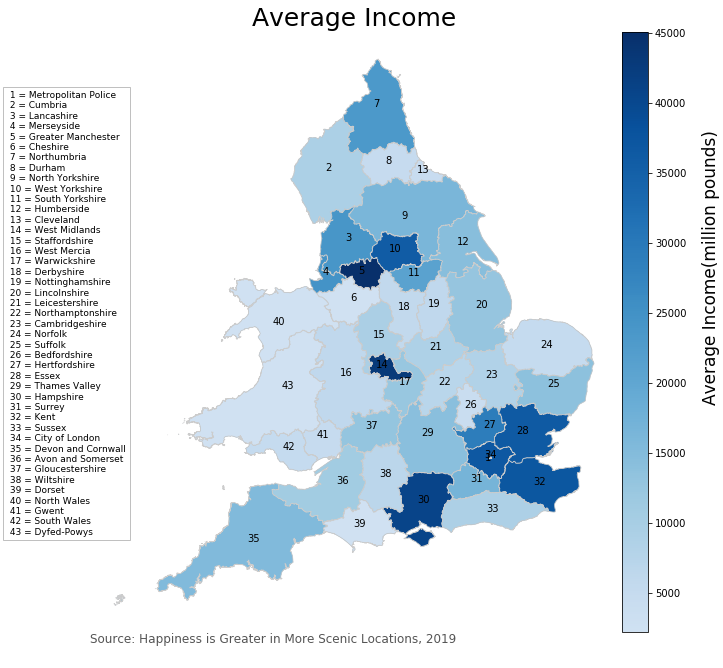

In [29]:
merged = map_df.set_index("pfa16nm").join(df_crime.set_index("AreaName"))
merged = merged.join(df_income)

# set a variable that will call whatever column we want to visualise on the map
variable = '2017'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

#labeling
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
base = map_df.plot(ax = ax)
for idx, row in map_df.iterrows():
    plt.annotate(s=row['objectid'], xy=row['coords'], horizontalalignment='center', color = 'black')

cmap_2 = plt.get_cmap('Greens')
new_cmap_2 = truncate_colormap(cmap, 0.2, 1)
merged.plot(column = variable, cmap = new_cmap_2, linewidth = 0.8, ax = base, edgecolor = '0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=new_cmap_2, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title and y label
title = ax.set_title("Average Income", fontdict = {'fontsize': '25', 'fontweight' : '3'})
y_axis = ax.annotate("Average Income(million pounds)", xy = (0.97, 0.4), xycoords = 'figure fraction', rotation = 'vertical',
                    fontsize = 17)

# create an annotation for the data source
ax.annotate('Source: Happiness is Greater in More Scenic Locations, 2019', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# legend box for county labels
leg = pd.DataFrame()
leg['Police Force Area'] = map_df['objectid'].map(str) + ' = ' + map_df['pfa16nm']
ax.annotate(leg.to_string(formatters={'Police Force Area':'{{:<{}s}}'.format(leg['Police Force Area'].str.len().max()).format},
                          index=False, header = None), 
            xy = (0.01,0.2), xycoords = 'figure fraction', fontsize = 9, color = 'black', horizontalalignment = 'left',
            bbox=dict(facecolor='none', edgecolor='silver'))

plt.show()

## Multivariable Analysis Setup:

Now that we have a better understanding of our income data, and have its correlation values in our correlation matrix, we can now conduct our multivariable analysis. But we first compare some different types of crime to income so we can see which ones would be worth studying in a multivariable analysis. Below are our null hypothesis along with our alpha value.


#### Complaring p-value with alpha value = 0.01
Null hypothesis: Two variables are not linearly correlated. 

If our p value is less than alpha, we reject the null hypothesis and thus conclude that the two variables are correlated. If otherwise, we accept the null hypothesis and conclude that the two variables are not correlated.

### Linear regression on average scenery and average income

                            OLS Regression Results                            
Dep. Variable:            avg_scenery   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     5.478
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0246
Time:                        15:05:00   Log-Likelihood:                -18.604
No. Observations:                  40   AIC:                             41.21
Df Residuals:                      38   BIC:                             44.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0729      0.105     38.960      0.0

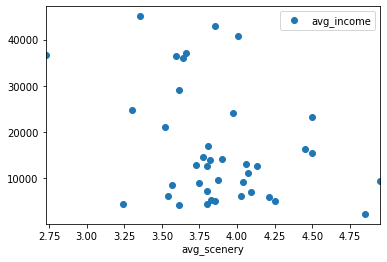

In [30]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statistics

outcome_7, predictors_7 = patsy.dmatrices("avg_scenery ~ avg_income", data = df_crime_norm)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())
df_crime_norm.plot(x='avg_scenery',y='avg_income',style='o')

From the linear analysis above, we can see that income and scenery are not related since the p value is 0.025 and that is greater than our alpha 0f 0.01.

### Linear regression on robbery and average income

From our correlation matrix, we leanred that robbery has the highest correlation value with average income, so we now do a linear regression on robbery and avg_income.

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     23.88
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.89e-05
Time:                        15:05:00   Log-Likelihood:                 242.91
No. Observations:                  40   AIC:                            -481.8
Df Residuals:                      38   BIC:                            -478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.975      0.0

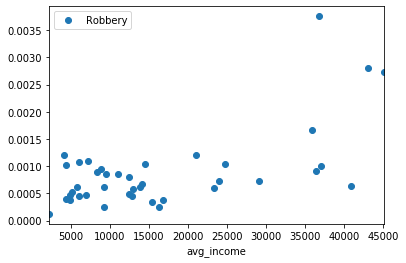

In [31]:
outcome_8, predictors_8 = patsy.dmatrices("Robbery ~ avg_income", data = df_crime_norm)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())
df_crime_norm.plot(x='avg_income',y='Robbery',style='o')

From the linear analysis above, we can see that income and robbery are related since the p value is 0.000 and that is less than our alpha 0f 0.01. This could be a potential option for our multivariable analysis.

### Linear regression on total crime rate and average income

Just as a comparison, we now look at total crime rate and average income. The correlation matrix value between these two was 0.44 which is not a very strong correlation, but a correlation nonetheless. For comparison, the correlation matrix value between robbery and average income was 0.66.

                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     9.522
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00378
Time:                        15:05:00   Log-Likelihood:                 105.53
No. Observations:                  40   AIC:                            -207.1
Df Residuals:                      38   BIC:                            -203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0703      0.005     14.971      0.0

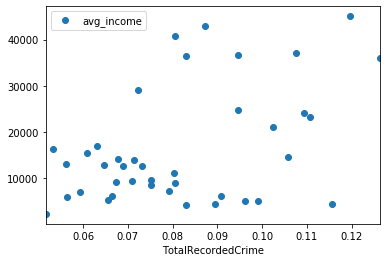

In [32]:
outcome_8, predictors_8 = patsy.dmatrices("TotalRecordedCrime ~ avg_income", data = df_crime_norm)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())
df_crime_norm.plot(x='TotalRecordedCrime',y='avg_income',style='o')


As expected, there is a correlation since the p value is less than alpha. However, total crime is not a very specific category and does not tell us much about the crime occurring in our areas. Therefore we will not study it in a multivariable analysis.

## Multivariable analysis:

From our linear regression testing above, we found that robbery was the highest category of crime correlated to average income, and theft from the person was the highest category compared to avg_scenery. This was also confirmed in our correlation matrices. 

We will now look at a multivariable analysis with scenery and income on robbery and another with scenery and income on theft from the person.

### Multivariable linear regression on scenery, average income, and robbery

In [33]:
outcome_9, predictors_9 = patsy.dmatrices("Robbery ~ avg_income + avg_scenery", data = df_crime_norm)
mod_9 = sm.OLS(outcome_9, predictors_9)
res_9 = mod_9.fit()
print(res_9.summary())

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     28.93
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.73e-08
Time:                        15:05:00   Log-Likelihood:                 251.99
No. Observations:                  40   AIC:                            -498.0
Df Residuals:                      37   BIC:                            -492.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0039      0.001      4.936      

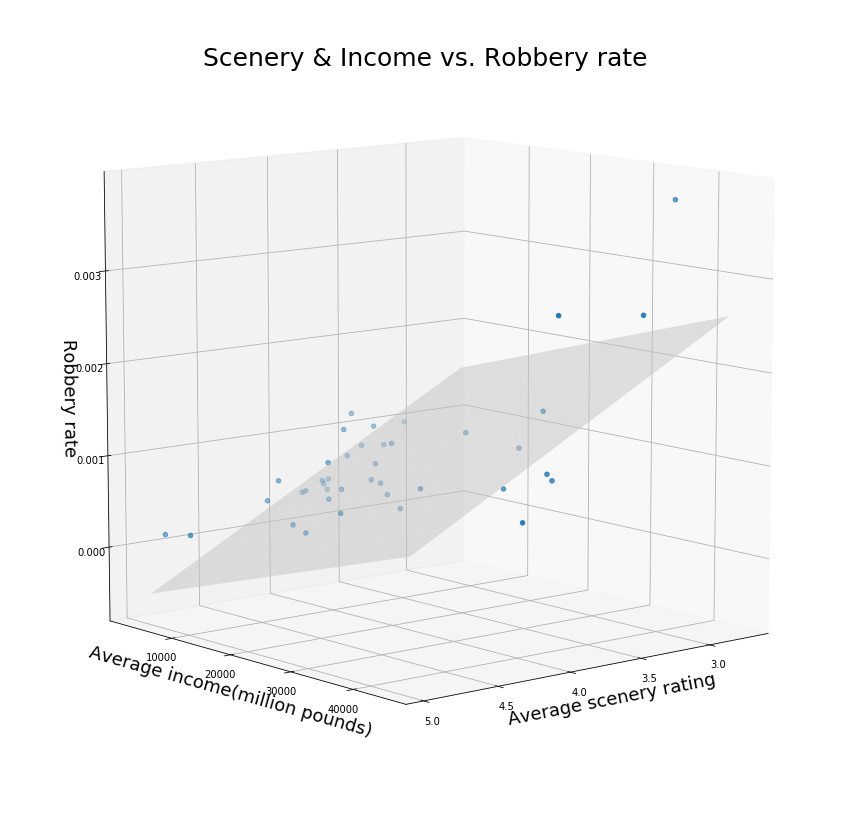

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(min(df_crime_norm['avg_scenery']),max(df_crime_norm['avg_scenery']),10)
y = np.linspace(min(df_crime_norm['avg_income']),max(df_crime_norm['avg_income']),10)

X,Y = np.meshgrid(x,y)
Z = 0.0039 -0.0009*X + 2.562e-08*Y


threedee = plt.figure(figsize = (15,15)).gca(projection='3d',elev=10,azim=50)
threedee.scatter(df_crime_norm['avg_scenery'], df_crime_norm['avg_income'], df_crime_norm['Robbery'])
threedee.set_xlabel('Average scenery rating',fontsize = 18)
threedee.set_ylabel('Average income(million pounds)',fontsize = 18)
threedee.set_zlabel('Robbery rate',fontsize = 18)
threedee.set_title('Scenery & Income vs. Robbery rate',fontdict = {'fontsize': '25', 'fontweight' : '3'})

threedee.plot_surface(X,Y,Z,color='#FFFFFF',alpha=0.5)
plt.show()

Our multivariable linear regression shows robbery is correlated with scenery rating and average income sa both p values are 0. It describes that as income increases and scenery decreases, robbery tends to increase. This confirms what our correlation matrix showed.

### Multivariable linear regression on scenery, average income, and theft from the person

In [35]:
outcome_9, predictors_9 = patsy.dmatrices("TheftFromThePerson ~ avg_income + avg_scenery", data = df_crime_norm)
mod_9 = sm.OLS(outcome_9, predictors_9)
res_9 = mod_9.fit()
print(res_9.summary())

                            OLS Regression Results                            
Dep. Variable:     TheftFromThePerson   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     21.12
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           7.61e-07
Time:                        15:05:01   Log-Likelihood:                 245.25
No. Observations:                  40   AIC:                            -484.5
Df Residuals:                      37   BIC:                            -479.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0047      0.001      5.094      

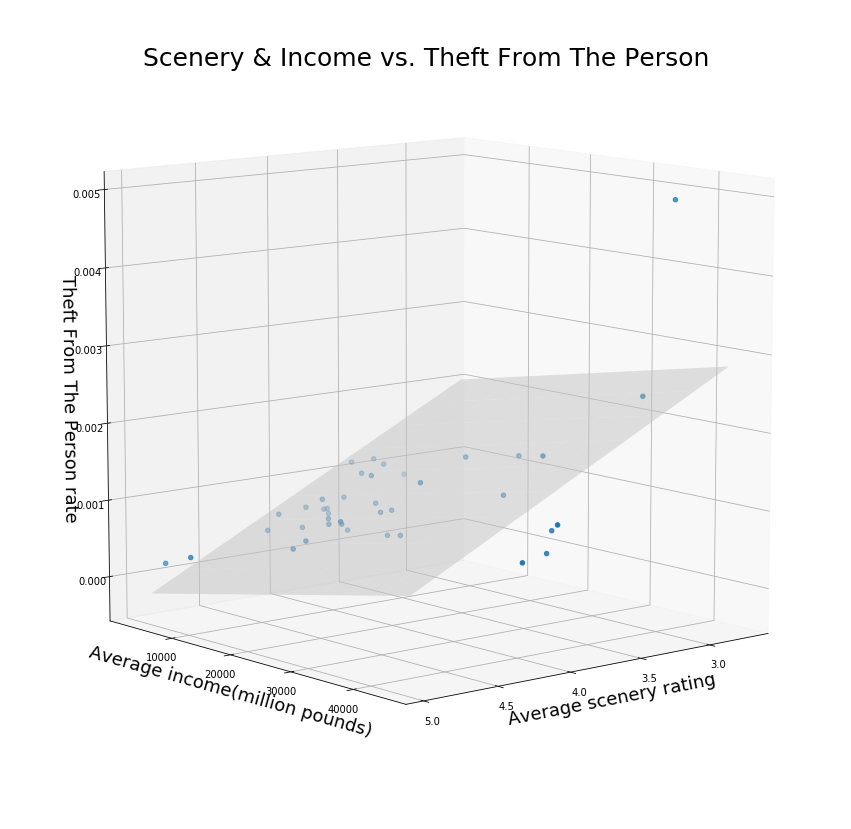

In [36]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(min(df_crime_norm['avg_scenery']),max(df_crime_norm['avg_scenery']),10)
y = np.linspace(min(df_crime_norm['avg_income']),max(df_crime_norm['avg_income']),10)

X,Y = np.meshgrid(x,y)
Z = 0.0047 -0.0010*X + 1.935e-08*Y


threedee = plt.figure(figsize = (15,15)).gca(projection='3d',elev=10,azim=50)
threedee.scatter(df_crime_norm['avg_scenery'], df_crime_norm['avg_income'], df_crime_norm['TheftFromThePerson'])
threedee.set_xlabel('Average scenery rating',fontsize = 18)
threedee.set_ylabel('Average income(million pounds)',fontsize = 18)
threedee.set_zlabel('Theft From The Person rate',fontsize = 18)
threedee.set_title('Scenery & Income vs. Theft From The Person',fontdict = {'fontsize': '25', 'fontweight' : '3'})

threedee.plot_surface(X,Y,Z,color='#FFFFFF',alpha=0.5)
plt.show()

Our multivariable linear regression shows theft from the person is correlated with scenery rating but not average income since the p value is grater than alpha. It describes that as scenery decreases, theft from person tends to increase. There isn't a great deal of relation between theft from person and income and we can see that in the very minor slope between the two.

# Part 3 - What impacts scenery the most?
If scenery does have an effect on crime, what can be done to make places look more scenic?  Which features do people find aesthetically pleasing overall? We make a histogram of the highest rated and lowest rated features from the set of all counties.

In [37]:
# Plot highest rated categories
def plot_top_sorted(from_index, count, threshold):
    df_rate_mean = df_rate2.groupby(df_rate2['Category']).aggregate(aggregation_functions)
    df_rate_mean = df_rate_mean[df_rate_mean['num_pictures'] > threshold]
    top_sorted_df = df_rate_mean.sort_values(by='Avg_Rating', ascending=False)[from_index:from_index+count]
    plot_top = top_sorted_df['Avg_Rating'].plot(figsize=(15, 5), title='Highest Rated Scenery Type', kind='bar',yerr=top_sorted_df['Standard_Deviation'])
    plt.ylim(0, 10)
    plt.show()



In [38]:
# Plot lowest rated categories
def plot_bottom_sorted(from_index, count, threshold):   
    df_rate_mean = df_rate2.groupby(df_rate2['Category']).aggregate(aggregation_functions)
    df_rate_mean = df_rate_mean[df_rate_mean['num_pictures'] > threshold]
    bottom_sorted_df = df_rate_mean.sort_values(by='Avg_Rating')[from_index:from_index+count]
    plot_top = bottom_sorted_df['Avg_Rating'].plot(figsize=(15, 5), title='Lowest Rated Scenery Type', kind='bar',yerr=bottom_sorted_df['Standard_Deviation'])
    plt.ylim(0, 10)
    plt.show()


In [39]:
# Create dataframe containing ratings for categories
import re
df_rate2 = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'County', 'Image', 'Date', 'URL'])
df_rate2 = df_rate2.dropna()
df_rate2['Avg_Rating'] = df_rate2['Rating']
df_rate2['Standard_Deviation'] = df_rate2['Rating']
df_rate2 = df_rate2.drop(columns=['Rating'])
df_rate2['num_pictures'] = 1


In [40]:
# Clean category column
df_rate2['Category'] = df_rate2['Category'].map(lambda x: re.sub(r'\t+', '', x))
df_rate2['Category'] = df_rate2['Category'].str.replace("\uFFFD", "\"")
df_rate2['Category'] = df_rate2['Category'].str.replace("\"", "")
df_rate2['Category'] = df_rate2['Category'].str.strip()
df_rate2['Category'] = df_rate2['Category'].str.lower()
df_rate2['Category'] = df_rate2['Category'].map(lambda x: re.sub(r'\s+',' ', x))

aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}


The following plot is the top and bottom 20 of all scenery categories that have at least 10 ratings. We decide to have a threshold so that we can get different subsets of the data.

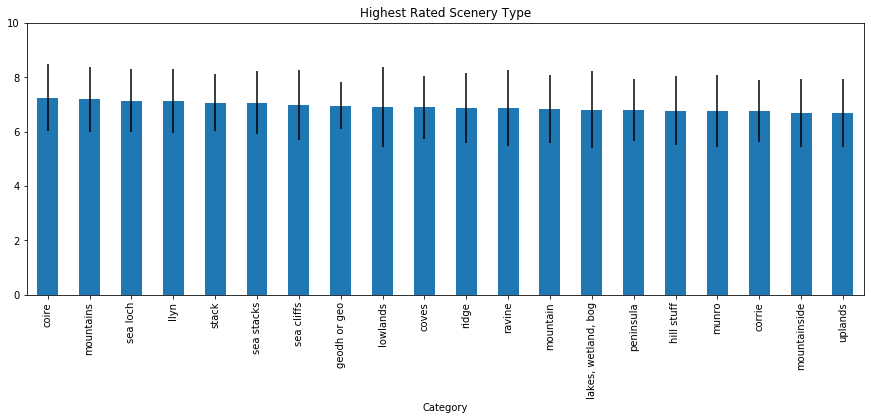

In [41]:
plot_top_sorted(0, 20, 10)

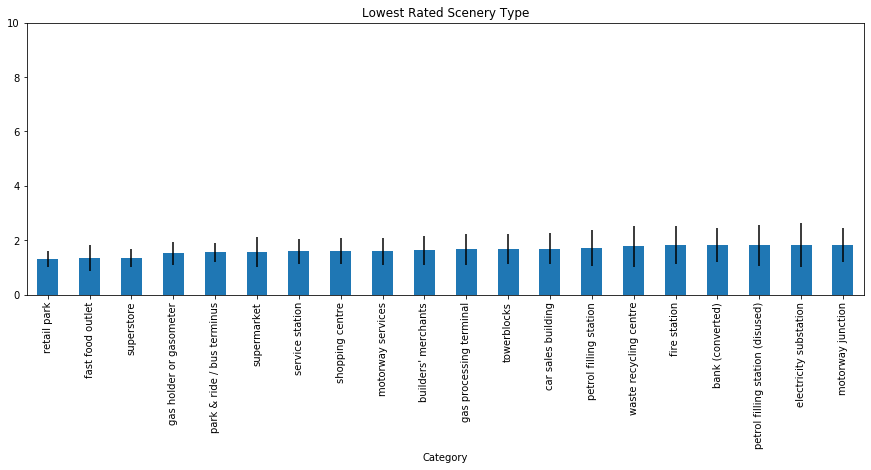

In [42]:
plot_bottom_sorted(0, 20, 10)

All of the top 20 most scenic features are natural features and the bottom 20 are man-made features. The data shows that nature categories are the most scenic and man-made buildings such as shops and vehicle stations associated with cities are perceived as less scenic.

The graph below is the entire dataset of scenery categories that have over 700 rated photos.

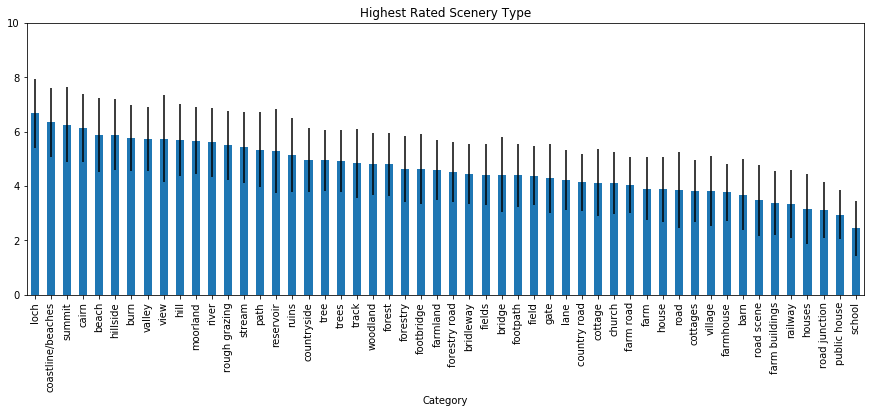

In [43]:
plot_top_sorted(0, 100, 700)

Natural features are still consistently perceived as more pleasing than man-made features. Features with water such as lochs(lakes), beaches and rivers have the best scenery rating. Rural settings such as farms and cottages are in the middle. Features associated with cities such as schools and roads are rated the lowest. It is surprising that the rating for school is so low, followed by public houses that are a common sight in cities.

A step to curbing crime may be adding more nature to cities. This can include planting trees, creating parks, and building fountains, as features with water were rated highly scenic. Adding these features near schools, roads and commerical facilities would provide the most benefit, as these places normally have poor scenery and yet people frequent them often.

# Ethics & Privacy
We have permission to use this data for this purpose because all the data used is publically available and two datasets are publicly available census data from the Office of National Statistics. No privacy was violated by this study because all data was anonymous, free of any identifying information outside of general region, and publically available. The scenery data may have potential bias towards people of high socioeconomic status since the ratings were collected via website which required the use of a computer or at least a smartphone. The crime rate data may have inherent bias from the police system since it is possible there are less strict reporting enforcement in some regions over others. An ethical issue that may result from this study is improper assumption of causation and subsequent changes of policies in policing and/or governance that could negatively impact citizens. For example, over policing in areas of less perceived scenery without proof of scenic causation of crime in the area or criminals moving to more scenic areas with lower crime reports to avoid prosecution.

# Conclusion & Discussion
### Summarize project and analysis done
We looked into how crime rate is affected by an area's scenery using the dataset we webscraped. We hypothesized that there would be less crime in more scenic areas. We started off by conducting some exploratory data analysis on our datsets, looking at the statistics and visualizing them geospatially. The statistical and geospatial approaches helped describe our large datasets, allowing us to qualitatively study over 200,000 datapoints using plots. Once  a good understanding of the data was established, we then began our analyses. We initially only planned for doing linear regression models for a select few categories of crime, these being chosen using our correlation matrices. We however realized that crime is something that is very complex and cannot by simply modeled solely on scenery ratings of an area. This is where we introduced the income data, allowing us to conduct multivariable analyses. With our results, we went back to our scenery data and tried to gain some new insights that could be applied in urban planning.

### Discuss results and significance
From our analyses, we can say that crime is negatively correlated with average scenery rating; specifically, Theft From The Person, Theft Offences, Vehicle Offences, Residential Burglary, and Sexual Offences all decrease as scenery rating increases (Theft of person refers to pickpocketing while theft offenses refers to stolen property). Also, taking a closer look at our scenery data, we found that humans rate nature higher than man made structures.




### Limitations<br/>
We were limited by the small sample size of our data. While there was a lot of data for each individual dataset, when we crossed it with the crime and income datasets, the number of county areas they had in common were actually very small. Moreover, passing the p-test doesn't guarantee that the data is highly correlated. It becomes more likely that data points are correlated as a result of coincidence.

We are also limited in that the ratings of the scenery of an area might be biased because it depends on the quality of the photo.

There is a downside to county-level analysis when the scenery data is on a smaller scale. It becomes harder to associate scnery with crime because within a county there can be many scenic and non-scenic locations. Therefore, it becomes hard to argue for a specific policing policy of an area, such as increasing surveylance on urban looking areas, because the specific locations where the crime happened is lost with county-level data. We can only know in a big-picture sense that counties with more scenic locations compared to less scenic ones may have less crime. And we can make a guess on what features will increase the scenery value of a county the most. A limit to this is that the details of the scenic location is also lost because they are generalized to categories. 

While we do see the correlation, we cannot conclude that scenery directly reduces crime rates. While our data showed that income did not influence crime levels, there could be other factors that affect crime rates. For instance, scenery can increase happiness, and increased happiness can reduce crime. This study could be improved if we had happiness data, as there is probably a more direct link with scenery and happiness. 

Also,this study is focused on only the UK and may not be a global phenomenon/these findings will not translate to counties around the world

### Impact to society<br/>
While the study was limited by the small amount of overlapping data we had between crime and scenery, it points to a possible correlation between unscenic areas and higher instances of certain crime, especially theft and burglary. This study can encourage people to explore this topic more. Moreover, this study could help us plan our future cities, making sure to try our best to retain as much of the natural beauty we can in an area. It can encourage urban planners to consider the importance of creating beautiful places, which is often seen as not worth the cost. It may be worth it in the long run in protecting cities from crime.

It should be cautioned that our conclusion that less scenic areas have more crime does not mean we can make generalizations about individuals. To say that an individual living in a less sightly neighborhood will be more likely to commit crime would be an ecological fallacy.